In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

# correlation
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
# Regression
from sklearn.linear_model import LinearRegression
import pandas as pd
from tqdm import tqdm

In [2]:
vector_dir = 'vectors'
models = os.listdir(vector_dir)
print(models)

['best-multilingual-clip-model-1e-05-10-0.5.pt', 'en-clip-model-1e-05-10-0.5.pt']


In [3]:
# Load the vectors
vectors = {}
for model in models:
    vec_files = [file for file in os.listdir(os.path.join(vector_dir, model)) if len(file.split('_')) == 3]
    vectors[model] = {'captions': {}, 'image': None}
    langs = [file.split('_')[0] for file in vec_files]
    for lang, filename in zip(langs, vec_files):
        with open(os.path.join(vector_dir, model, filename), 'r') as f:
            vectors[model]['captions'][lang] = [np.array([float(num) for num in line.split()]) for line in f.readlines()]

    with open(os.path.join(vector_dir, model, 'image_vectors.tsv'), 'r') as f:
        vectors[model]['image'] = [np.array([float(num) for num in line.split()]) for line in f.readlines()]



In [4]:
en_df = pd.DataFrame({lang:vecs for lang, vecs in vectors['en-clip-model-1e-05-10-0.5.pt']["captions"].items()})
en_df['img'] = vectors['en-clip-model-1e-05-10-0.5.pt']['image']
ml_df = pd.DataFrame({lang:vecs for lang, vecs in vectors['best-multilingual-clip-model-1e-05-10-0.5.pt']["captions"].items()})
ml_df['img'] = vectors['best-multilingual-clip-model-1e-05-10-0.5.pt']['image']


In [18]:
en_df.head()

,bn,de,en,es,fr,hi,ja,zh,img
0,"[-1.5548760890960693, 0.6810610294342041, -0.0...","[-1.5741938352584839, 0.6844558119773865, 0.34...","[-1.685235619544983, 0.5161712169647217, -0.30...","[-1.8060418367385864, 0.5170007944107056, 0.35...","[-1.864747166633606, 0.8021662831306458, 0.116...","[-1.271728515625, 0.3392541706562042, 0.042938...","[-1.6165322065353394, 0.8164139986038208, 0.01...","[-1.7045563459396362, 0.7707745432853699, 0.02...","[-0.128860205411911, -0.1473875641822815, -0.0..."
1,"[0.3894144892692566, 1.5757122039794922, -1.31...","[0.8932567238807678, 0.7992349863052368, -1.21...","[1.0082249641418457, 0.6654397249221802, -0.91...","[0.7522577047348022, 0.9433582425117493, -0.73...","[1.218640923500061, 1.1921069622039795, -1.539...","[0.5753427743911743, 1.820239543914795, -1.047...","[0.43080398440361023, 1.3213672637939453, -0.9...","[0.7117471694946289, 0.9544617533683777, -0.54...","[-0.011015305295586586, -0.0674818605184555, -..."
2,"[-1.8102965354919434, 0.9681137204170227, 0.73...","[-1.873762845993042, 1.0138816833496094, 0.556...","[-1.7330714464187622, 0.5727519392967224, 0.57...","[-1.7201581001281738, 0.9546651840209961, 0.21...","[-1.924923300743103, 0.6440960764884949, 0.568...","[-1.4757603406906128, 1.229015588760376, -0.01...","[-1.8553879261016846, 0.5489137172698975, 0.90...","[-1.7599610090255737, 0.9063096046447754, 0.60...","[-0.10974656790494919, 0.00043304264545440674,..."
3,"[-0.024753045290708542, -0.6362867951393127, -...","[-0.16513998806476593, -0.457780659198761, -0....","[-0.5468854308128357, -0.6152350902557373, 0.1...","[-0.3289796710014343, 0.363918662071228, -0.94...","[-0.5888369679450989, -0.7938545346260071, -0....","[0.03638254478573799, -0.7276890277862549, -0....","[-0.10470673441886902, -0.7738499045372009, -0...","[-0.4360480308532715, -0.5461980104446411, -0....","[0.08777273446321487, -0.016808772459626198, 0..."
4,"[0.6296690106391907, 2.3801658153533936, -1.40...","[0.7194811105728149, 1.3756983280181885, -0.62...","[0.9225629568099976, 0.023533806204795837, 0.2...","[1.4166542291641235, 1.4726159572601318, -0.62...","[1.1518241167068481, 0.9380943179130554, -1.16...","[0.07735155522823334, 1.5679137706756592, -1.0...","[0.17605911195278168, 0.6884151101112366, -0.2...","[1.012070894241333, 0.7671627402305603, -0.519...","[0.0639694556593895, -0.08377622067928314, 0.1..."


In [19]:
ml_df.head()

,bn,de,en,es,fr,hi,ja,zh,img
0,"[-0.8170997500419617, 0.3549168109893799, 0.42...","[-0.25045672059059143, -0.04519844800233841, 0...","[-0.6494786739349365, -0.047296248376369476, 0...","[-0.8571661710739136, -0.08286299556493759, 0....","[-0.4370531439781189, 0.2922407388687134, 0.34...","[-0.6021007299423218, 0.3338594138622284, 0.59...","[-0.7623289227485657, 0.40069061517715454, 0.2...","[-0.34951677918434143, 0.42634648084640503, 0....","[0.14489132165908813, 0.01800890639424324, -0...."
1,"[-0.8140665888786316, -1.520797610282898, -0.7...","[-0.7434970140457153, -1.109387755393982, -0.1...","[-0.39234206080436707, -0.906099796295166, -0....","[-0.48569047451019287, -0.8739680647850037, 0....","[-0.3804752826690674, -1.8741471767425537, -0....","[-0.6429857611656189, -0.5972461104393005, 0.5...","[-0.5474545955657959, -0.6756994128227234, 0.3...","[-0.31047773361206055, -1.6743568181991577, 0....","[-0.15483097732067108, 0.0681685358285904, -0...."
2,"[0.8603973388671875, 0.08346164226531982, -0.0...","[0.41494810581207275, 0.8598878979682922, 0.30...","[0.63275146484375, 0.5855430960655212, 0.36935...","[1.0749648809432983, 0.5260554552078247, 0.469...","[0.9181501865386963, 0.8457500338554382, 0.490...","[0.8046108484268188, 0.8171116709709167, 0.219...","[0.87445068359375, 0.5009593367576599, 0.10220...","[0.3155418336391449, 0.8982724547386169, 0.079...","[0.024819854646921158, 0.15613573789596558, -0..."
3,"[1.8293060064315796, 0.08771616965532303, 0.29...","[1.5304590463638306, -0.18344652652740479, 0.0...","[1.366104006767273, 0.2352772057056427, 0.1421...","[1.6331727504730225, 0.23174044489860535, 0.02...","[1.092328667640686, 0.05403553694486618, 0.236...","[1.6129480600357056, 0.2815587818622589, 0.221...","[1.7178959846496582, 0.2507625222206116, -0.00...","[0.2627878189086914, -0.010044815018773079, 0....","[0.06704533100128174, 0.168766051530838, -0.16..."
4,"[0.4213065803050995, -0.8510227203369141, -0.3...","[0.47007811069488525, -0.5210999846458435, -0....","[0.29605796933174133, -0.3497001826763153, 0.0...","[0.5408045053482056, -0.19386917352676392, 0.1...","[0.24717260897159576, -0.9573624730110168, 0.0...","[0.18973305821418762, 0.12562546133995056, 0.2...","[0.46047741174697876, 0.14694306254386902, 0.1...","[0.2563735544681549, -0.6948585510253906, 0.07...","[-0.06263032555580139, 0.2579110264778137, -0...."


In [6]:
cols = en_df.columns.to_list()

In [32]:
cols = en_df.columns.to_list()
cols.remove('img')
en_k_scores = {}
ml_k_scores = {}
for k in [1,5,10]:
    en_k_scores[k] = []
    ml_k_scores[k] = []
    print(k)
    for lang in cols:
        print(lang)
        en_dists = euclidean_distances(en_df[lang].to_list(), en_df['img'].to_list())
        en_acc = top_k_accuracy_score(np.arange(len(en_dists)), en_dists*(-1), k=k)
        ml_dists = euclidean_distances(ml_df[lang].to_list(), ml_df['img'].to_list())
        ml_acc = top_k_accuracy_score(np.arange(len(ml_dists)), ml_dists*(-1), k=k)
        
        en_k_scores[k].append(en_acc)
        ml_k_scores[k].append(ml_acc)
        print(en_acc, ml_acc)
        print()
    print()
    print()

1
bn
0.0268 0.1372

de
0.0968 0.2134

en
0.141 0.2536

es
0.0752 0.2448

fr
0.087 0.214

hi
0.0456 0.2336

ja
0.0752 0.2338

zh
0.085 0.1956



5
bn
0.1056 0.3678

de
0.293 0.499

en
0.4034 0.5554

es
0.2544 0.5406

fr
0.2712 0.5076

hi
0.1654 0.5288

ja
0.2412 0.5268

zh


KeyboardInterrupt: 

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [01:02<00:00,  7.76s/it]


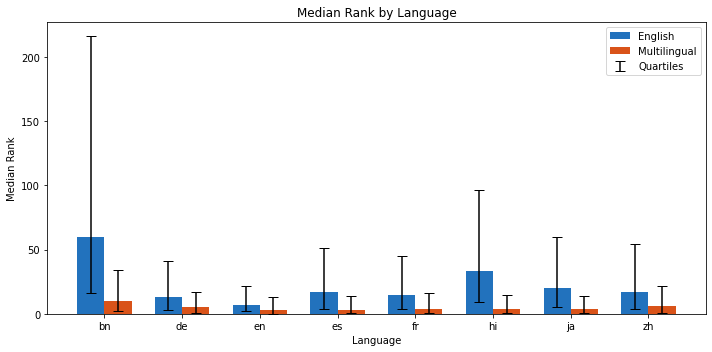

In [14]:
import matplotlib.pyplot as plt

langs = cols
langs.remove('img')
en_median_ranks = []
ml_median_ranks = []
en_mean_ranks = []
ml_mean_ranks = []
en_upper_quartiles = []
ml_upper_quartiles = []
en_lower_quartiles = []
ml_lower_quartiles = []

color_en = np.array([0.1323, 0.4470, 0.7410, 1.0])
color_ml = np.array([0.8500, 0.3250, 0.0980, 1.0])

for lang in tqdm(langs):
    en_dists = euclidean_distances(en_df[lang].to_list(), en_df['img'].to_list())
    ml_dists = euclidean_distances(ml_df[lang].to_list(), ml_df['img'].to_list())
    true_idx = np.arange(len(en_dists))

    # The rank of the true image
    ranks = np.argsort(en_dists, axis=1)
    true_rank = np.array([ranks[idx].tolist().index(idx) for idx in true_idx])
    en_mean_ranks.append(np.mean(true_rank))
    en_median_ranks.append(np.median(true_rank))
    en_upper_quartiles.append(np.percentile(true_rank, 75))
    en_lower_quartiles.append(np.percentile(true_rank, 25))

    # The rank of the true image
    ranks = np.argsort(ml_dists, axis=1)
    true_rank = np.array([ranks[idx].tolist().index(idx) for idx in true_idx])
    ml_mean_ranks.append(np.mean(true_rank))
    ml_median_ranks.append(np.median(true_rank))
    ml_upper_quartiles.append(np.percentile(true_rank, 75))
    ml_lower_quartiles.append(np.percentile(true_rank, 25))

en_mean_ranks = np.array(en_mean_ranks)
ml_mean_ranks = np.array(ml_mean_ranks)
en_median_ranks = np.array(en_median_ranks)
ml_median_ranks = np.array(ml_median_ranks)
en_upper_quartiles = np.array(en_upper_quartiles)
ml_upper_quartiles = np.array(ml_upper_quartiles)
en_lower_quartiles = np.array(en_lower_quartiles)
ml_lower_quartiles = np.array(ml_lower_quartiles)

x = np.arange(len(langs))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_ylabel('Median Rank')
ax.set_xlabel('Language')
ax.set_title('Median Rank by Language')
ax.set_xticks(x)
ax.set_xticklabels(langs)


ax.bar(x - width/2, en_median_ranks, width, label='English', color=color_en)
ax.bar(x + width/2, ml_median_ranks, width, label='Multilingual', color=color_ml)
# Add whiskers
ax.errorbar(x - width/2, en_median_ranks, yerr=[en_median_ranks - en_lower_quartiles, en_upper_quartiles - en_median_ranks], fmt='none', color="black", capsize=5, label='Quartiles')
ax.errorbar(x + width/2, ml_median_ranks, yerr=[ml_median_ranks - ml_lower_quartiles, ml_upper_quartiles - ml_median_ranks], fmt='none', color="black", capsize=5)

ax.legend()

fig.tight_layout()

plt.savefig('median_rank.png', dpi=300)
plt.show()


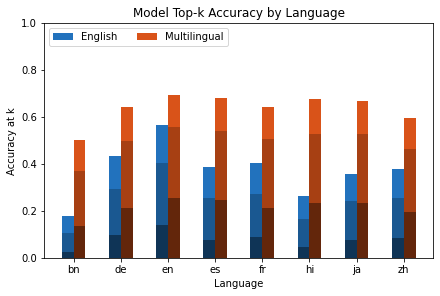

In [77]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

langs = cols
scores_list = [{
    'English': en_scores,
    'Multilingual': ml_scores,
} for en_scores, ml_scores in zip(list(en_k_scores.values())[::-1], list(ml_k_scores.values())[::-1])]

x = np.arange(len(langs))  # the label locations
width = 0.25  # the width of the bars

color_en = np.array([0.1323, 0.4470, 0.7410, 1.0])
color_ml = np.array([0.8500, 0.3250, 0.0980, 1.0])

fig, ax = plt.subplots(layout='constrained')
first = True
k = 1
plots = []
for scores in scores_list: 
    multiplier = 0  
    for model, score in scores.items():
        offset = width * multiplier + 0.125
        
        color = (color_en if model == "English" else color_ml)
        color *= k
        if first:
            rects = ax.bar(x + offset, score, width, label=model, color=color, alpha=1)
        else:
            rects = ax.bar(x + offset, score, width, color=color, alpha=1)
        # ax.bar_label(rects, padding=3)
        multiplier += 1
    k /= 1.3
    first = False

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy at k')
ax.set_xlabel('Language')
ax.set_title('Model Top-k Accuracy by Language')
ax.set_xticks(x+width, langs)  # Removed "+ width" to center the groups
ax.legend(loc='upper left', ncols=3)

ax.set_ylim(0, 1)
plt.savefig('topk.png', dpi=300)
plt.show()

In [9]:
def load_image(img_id):
    for image in os.listdir('val2017/val2017'):
        if image.endswith(f'{img_id}.jpg'):
            return plt.imread(os.path.join('val2017/val2017', image))

'zh'

English
Top 5:
A person is removing an object from the plastic casing.
The passenger train has elaborate spray paint on the side.
A bathroom with toilet and sink with lots of items on the sink counter.
A woman smiles at an evening event in front of a clock.
A young man is standing behind a counter, carefully looking over an array of food preparation equipment and related items. 


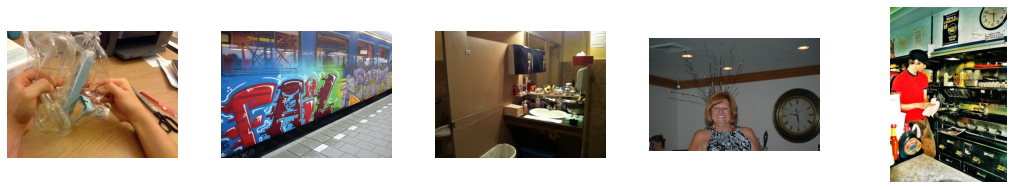

Worst 5:
A plate with two ham sandwiches garnished with lettuce
two zebras standing in line with the head of one resting on the back of the other 
The bench's maximum weight capacity may be strained.
A bunch of bananas is displayed on a counter top.
Giraffes leaning down to drink at a watering hole


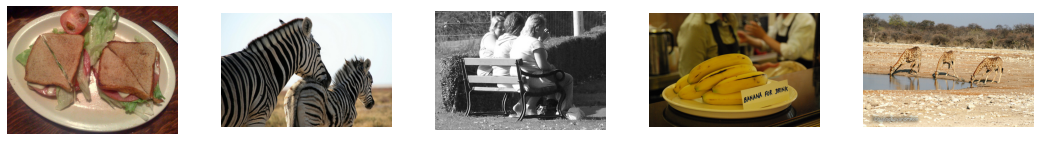

Multilingual
Top 5:
An apple computer monitor, keyboard and mouse sits on top of a clean wooden desk. 
A train blowing smoke is coming down the tracks.
A boy in an orange t-shirt plays a video game.
A man in a wheel chair who is holding a baseball bat.
Several mounted police officers and their horses line up on the street. 


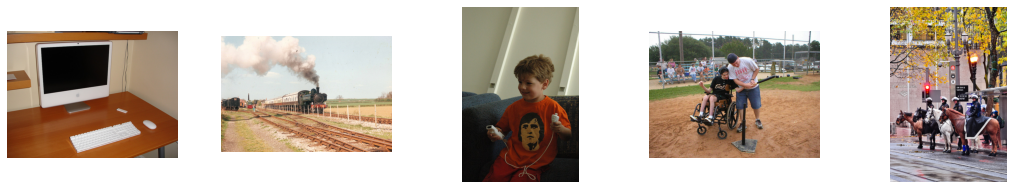

Worst 5:
a pack of elephants grazing in a dirt enclosed space
A husky stands by as a skier stands there.
Two elephants with a rubber ball are kept in the area with a little chain.
some snow skiers one in a blue jacket the other white
There is a picture of an outside territory.



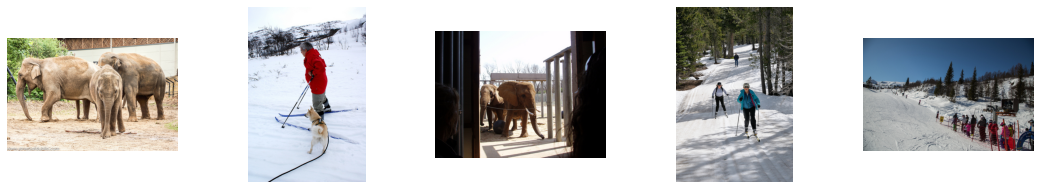

In [58]:
with open('captions_val2017_ordered_translated_with_unseen.json', 'r') as f:
    captions = json.load(f)
lang = 'bn'
for model, df in [("English", en_df), ("Multilingual", ml_df)]:
    print(model)
    # dists = euclidean_distances(df[lang].to_list(), df['img'].to_list())
    # diag = np.diag(dists)

    # top_5 = np.argsort(diag)[:5]
    # print(top_5)
    # print(diag[top_5])

    # back_5 = np.argsort(diag)[-5:]
    # print(back_5)
    # print(diag[back_5])
    dists = euclidean_distances(df[lang].to_list(), df['img'].to_list())
    true_idx = np.arange(len(dists))

    # The rank of the true image
    ranks = np.argsort(dists, axis=1)
    true_rank = np.array([ranks[idx].tolist().index(idx) for idx in true_idx])
    indices = np.argsort(true_rank)
    top_5 = indices[:5]
    back_5 = indices[-5:]
    

    print("Top 5:")
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    fig.tight_layout(pad=1.0)  # Add this line to adjust the spacing between subplots
    for i in range(5):
        text = captions[top_5[i]]['captions']['en']
        img_id = captions[top_5[i]]['image_id']
        print(text)
        axs[i].imshow(load_image(img_id))
        # axs[i].set_title(text, wrap=True)  # Add wrap=True to enable text wrapping
        axs[i].axis('off')
    plt.savefig(f'top5_{model}_{lang}.png', dpi=300)
    plt.show()

    print("Worst 5:")
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    fig.tight_layout(pad=1.0)  # Add this line to adjust the spacing between subplots
    for i in range(5):
        text = captions[back_5[i]]['captions']['en']
        img_id = captions[back_5[i]]['image_id']
        print(text)
        axs[i].imshow(load_image(img_id))
        # axs[i].set_title(text, wrap=True)  # Add wrap=True to enable text wrapping
        axs[i].axis('off')
    plt.savefig(f'back5_{model}_{lang}.png', dpi=300)
    plt.show()
    

{'image_id': 415741,
 'id': 71258,
 'captions': {'en': 'A house where you can see the bedroom and relaxing room.',
  'es': 'Una casa donde se puede contemplar el dormitorio y sala de relax.',
  'ja': '寝室とリラックスルームが見える家。',
  'hi': 'एक ऐसा घर जहां आप शयनकक्ष और आराम कक्ष देख सकते हैं।',
  'fr': "Une maison où l'on peut voir la chambre et la salle de détente.",
  'de': 'Ein Haus, in dem Sie das Schlafzimmer und den Ruheraum sehen können.',
  'zh': '一座可以看到卧室和休闲室的房子。',
  'bn': 'একটি ঘর যেখানে আপনি শয়নকক্ষ এবং বিশ্রামের ঘর দেখতে পারেন।'}}

In [53]:
for lang in cols:
    print(lang)
    en_dists = euclidean_distances(en_df[lang].to_list(), en_df['img'].to_list())
    ml_dists = euclidean_distances(ml_df[lang].to_list(), ml_df['img'].to_list())
    minimum = np.array([np.min(en_dists), np.min(ml_dists)])
    maximum = np.array([np.max(en_dists), np.max(ml_dists)])
    mean_diagonal = np.array([np.mean(np.diag(en_dists)), np.mean(np.diag(ml_dists))])
    print((mean_diagonal-minimum)/(maximum-minimum))
    print()
    # print(np.mean(np.diag(en_dists))/np.max(en_dists), (np.mean(np.diag(ml_dists))-np.min(ml_dists))/np.max(ml_dists))
    
    print()
        
        

bn
[0.50691026 0.44616393]


de
[0.46694732 0.4358142 ]


en
[0.44491849 0.42003282]


es
[0.46963842 0.406296  ]


fr
[0.4616032  0.44327273]


hi
[0.50556193 0.44979714]


ja
[0.48097903 0.42972414]


zh
[0.49801754 0.42057265]




In [10]:
from tqdm import tqdm
for lang in cols:
    print(lang)
    en_text_dists = euclidean_distances(en_df[lang].to_list(), en_df[lang].to_list()).flatten()
    en_img_dists = euclidean_distances(en_df['img'].to_list(), en_df['img'].to_list()).flatten()
    print(pearsonr(en_text_dists, en_img_dists))
    regression = LinearRegression().fit(en_text_dists.reshape(-1, 1), en_img_dists.reshape(-1, 1))
    print(regression.score(en_text_dists.reshape(-1, 1), en_img_dists.reshape(-1, 1)))
    
    
    print()
    ml_text_dists = euclidean_distances(ml_df[lang].to_list(), ml_df[lang].to_list()).flatten()
    ml_img_dists = euclidean_distances(ml_df['img'].to_list(), ml_df['img'].to_list()).flatten()
    print(pearsonr(ml_text_dists, ml_img_dists))
    regression = LinearRegression().fit(ml_text_dists.reshape(-1, 1), ml_img_dists.reshape(-1, 1))
    print(regression.score(ml_text_dists.reshape(-1, 1), ml_img_dists.reshape(-1, 1)))
    
    print()
    print()
    

bn
PearsonRResult(statistic=0.44378250107807876, pvalue=0.0)
0.19694290826312777

PearsonRResult(statistic=0.4905110650898058, pvalue=0.0)
0.24060110497556597


de
PearsonRResult(statistic=0.5865626080612677, pvalue=0.0)
0.344055693175626

PearsonRResult(statistic=0.5375312631941435, pvalue=0.0)
0.2889398589110921


en
PearsonRResult(statistic=0.5819289620005469, pvalue=0.0)
0.3386413168150221

PearsonRResult(statistic=0.5525684009018229, pvalue=0.0)
0.30533183767521543


es
PearsonRResult(statistic=0.5837599966051901, pvalue=0.0)
0.34077573363647506

PearsonRResult(statistic=0.549846529153508, pvalue=0.0)
0.3023312056221936


fr
PearsonRResult(statistic=0.5796852322252761, pvalue=0.0)
0.33603496846005987

PearsonRResult(statistic=0.5412697269194321, pvalue=0.0)
0.29297291727944663


hi
PearsonRResult(statistic=0.5381133046974302, pvalue=0.0)
0.2895659286924055

PearsonRResult(statistic=0.5456039814622794, pvalue=0.0)
0.29768370458752247


ja
PearsonRResult(statistic=0.583646906887593,